# Logistic Regression

In this example, we will learn a linear descision boundary to classify some data that can fall within
two classes. Two features (x and y coordinate) correspond to 1 label (which class)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('ggplot')

**Make a dataset**

Instead of finding a dataset we will make one up

In [ ]:
file_path = "./datasets/basic_linear_classification.csv"
if not os.path.isfile(file_path):
    np.random.seed(42)
    N = 1000
    x_coords = np.random.uniform(low=-5.0, high=5.0, size=[N])
    y_coords = np.random.uniform(low=-5.0, high=5.0, size=[N])

    # lets decide that our dataset's true boundary is y = 2*x,
    # so points on one side are class A and points on the other are class B
    labelled_data = []
    for i in range(len(x_coords.flatten())):
        if y_coords[i] < 2*x_coords[i]:
            labelled_data.append([x_coords[i], y_coords[i], 1.0])
        else:
            labelled_data.append([x_coords[i], y_coords[i], 0.0])

    labelled_data = np.array(labelled_data).T
    print(f"Shape: {np.shape(labelled_data)}")
    np.savetxt(file_path, labelled_data, delimiter=",")
    print(f"Data daved to {file_path}")

    color_strings = ["red" if i == 1 else "blue" for i in labelled_data[2,:]]
    fig, ax = plt.subplots(figsize=(5,3))
    ax.scatter(labelled_data[0,:], labelled_data[1,:], color=color_strings, alpha=0.5)
    plt.show()
else:
    print(f"{file_path} already exists")

**Load the dataset**

In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, path):
        data = np.loadtxt(path,delimiter=",")
        self.inputs = torch.from_numpy(data[0:2,:]).float()
        self.outputs = torch.from_numpy(data[2:,:]).float()
        print(f"inputs: {self.inputs.shape}\noutputs: {self.outputs.shape}")

    def __len__(self):
        return (len(self.inputs))

    def __getitem__(self, idx):
        return self.inputs[idx], self.outputs[idx]

In [ ]:
training_data = ClassificationDataset("./datasets/basic_linear_classification.csv")
train_dataloader = DataLoader(training_data)

In [ ]:
data = np.loadtxt("./datasets/basic_linear_classification.csv",delimiter=",")
inputs = data[0:2,:].T
labels = data[2:,:].T.flatten()

print(f"inputs.shape = {inputs.shape}")
print(f"labels.shape = {labels.shape}")

X_train, X_test, y_train,  y_test = train_test_split(
    inputs, labels, test_size=0.33, random_state=42)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)


**Define a model**

In [ ]:
# Define a linear model with torch.nn.Module
# 2 inputs (x,y) -> 1 label
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [ ]:
# instatiate the model based on the size of the input data
model = LinearModel()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
y_train.shape

In [ ]:
# get the training data from the dataloader
# train_features = train_dataloader.dataset.inputs
# train_labels = train_dataloader.dataset.outputs

num_epochs = 10000
loss_hist = []

for epoch in range(num_epochs):

    # Forward pass to get a prediction
    pred = model(X_train)

    # Compute the loss
    loss = criterion(torch.squeeze(pred), torch.squeeze(y_train))
    loss_hist.append(loss.detach().float())

    # Zero the gradients, do a backwards pass, and take a gradient step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(list(range(num_epochs)), loss_hist)
ax.set(xlabel="Epoch",ylabel="Loss")
plt.show()

In [16]:
X_test.shape

torch.Size([330, 2])

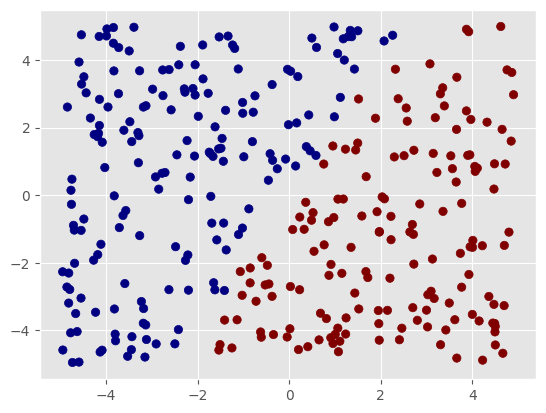

In [22]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='jet')

In [ ]:

def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()

    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    plt.xlabel(r'$\boldsymbol{x_1}$',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    plt.ylabel(r'$\boldsymbol{x_2}$',fontsize=16)
    plt.title(title)
    plt.show()


# Train Data
# model_plot(model,X_train,y_train,'Train Data')

# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')

In [37]:
accuracy = 100*np.count_nonzero((torch.squeeze(model(X_test)).round() == y_test).detach().numpy()) / len(y_test.squeeze())
print(f"Accuracy = {accuracy}%")


Accuracy = 100.0%


In [24]:
x1 = -4
x2 = 0
new_data = torch.tensor([x1,x2]).type(torch.FloatTensor)
with torch.no_grad():
    prediction = model(new_data).round()
    if prediction == 1.0:
        print(f'The model classifies this point as RED')
    else:
        print(f'The model classifies this point as BLUE')

The model classifies this point as BLUE
